In [1]:
import numpy as np
import matplotlib.pyplot as plt

def trigonometric(x, w=[1.85, 0.57, 4.37]): 
    return np.dot(w, [np.ones_like(x), np.sin(x), np.cos(x)])

def create_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(*domain, sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

Data is generated by a trigonomietric function
\begin{align}
t = w_0 + w_1 \sin(x) + w_2 \cos(x)
\end{align}

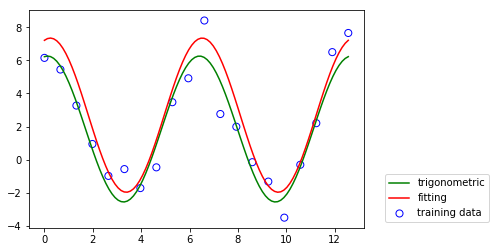

In [2]:
x_trig_train, t_trig_train = create_data(trigonometric, 20, 1, [0, 4.0*np.pi])

x_trig_test = np.linspace(0, 4.0*np.pi, 100)
t_trig_test = trigonometric(x_trig_test)

# design matrix
phi = np.array([np.ones_like(x_trig_train), np.sin(x_trig_train), np.cos(x_trig_train)]).transpose()

# we set initial w = 0
w = np.zeros(phi.shape[1])

eta = 0.25
# since we have 20 samples, we use gradient from each sample in order
for i in range(20):
    w = w + eta * (t_trig_train[i] - np.dot(w.T, phi[i])) * phi[i]

t_predicted = trigonometric(x_trig_test, w)

plt.scatter(x_trig_train, t_trig_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_trig_test, t_trig_test, c="g", label="trigonometric")
plt.plot(x_trig_test,t_predicted, c='r', label="fitting")
plt.legend(bbox_to_anchor=(1.05, 0.27), loc=2, borderaxespad=0.5)
plt.show()